# Image Classification with ```scikit-learn```

## Import packages

In [11]:
import os
import sys
sys.path.append(os.path.join(".."))
import utils.classifier_utils as clf_util

# Import teaching utils
import numpy as np


# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [12]:
os.getcwd()

'/Users/Nikita/Documents/GitHub/cds-viz/cds-visual-fork/nbs'

## Fetch data

We're using something called the MNIST dataset, a very famous dataset in image classification. It even has it's own [Wikipedia page](https://en.wikipedia.org/wiki/MNIST_database)!

For this session, we're just fetching the data from a website called [OpenML](https://www.openml.org/), an open collection of datasets and experiments. I'd recommend digging around in there and seeing what kinds of datasets are available for experiments - there might be something for an exam project.

We load the data here using a function from ```scikit-learn``` which takes the data from OpenML and assigns it directly to two variables.

In [14]:
X, y = fetch_openml('mnist_784', 
                    version=1, 
                    parser="auto",
                    return_X_y=True)

Let's first check what the labels are in our data. This is what we're trying to predict.

In [15]:
sorted(set(y))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Depending on the versions of ```pandas``` and ```sklearn``` that you're using, you may need to expressly convert these to ```numpy``` arrays.

In [16]:
X = np.array(X)
y = np.array(y)

__Predifine classes and number of classes__

We're going to start by making variables which contain the list of classes, and the total number of classes. This isn't strictly necessary, but we'll be using them later on in our notebook.

In [17]:
classes = sorted(set(y))
nclasses = len(classes)

**Question!** 

What does the data look like? What can you tell me about each individual image?

__Plot random sample__

I've created a util function called ```plot_sample()``` which simply plots a random sample of the data.

**Group task:** Go inspect the ```plot_sample()``` function (in utils -> classifier_utils.py) - can you explain what it does and how it works?


def plot_sample(X, y, classes, samples_per_class):
    """
    Plots a grid of samples for each class
    
    data: the data to be plotted
    classes: list of all classes
    samples_per_class: number of samples to show
    """
    # len classes, counts something
    nclasses = len(classes)
    figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)))

    # for each value in classes
    for idx_cls, cls in enumerate(classes):
        # pick some at random to plot
        idxs = np.flatnonzero(y == cls)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        # plot on a grid for comparison
        for i, idx in enumerate(idxs):
            plt_idx = i * nclasses + idx_cls + 1
            p = plt.subplot(samples_per_class, nclasses, plt_idx);
            p = sns.heatmap(np.reshape(X[idx], (28,28)), cmap=plt.cm.gray, 
                            xticklabels=False, yticklabels=False, cbar=False)
            p = plt.axis('off')
    
    return None


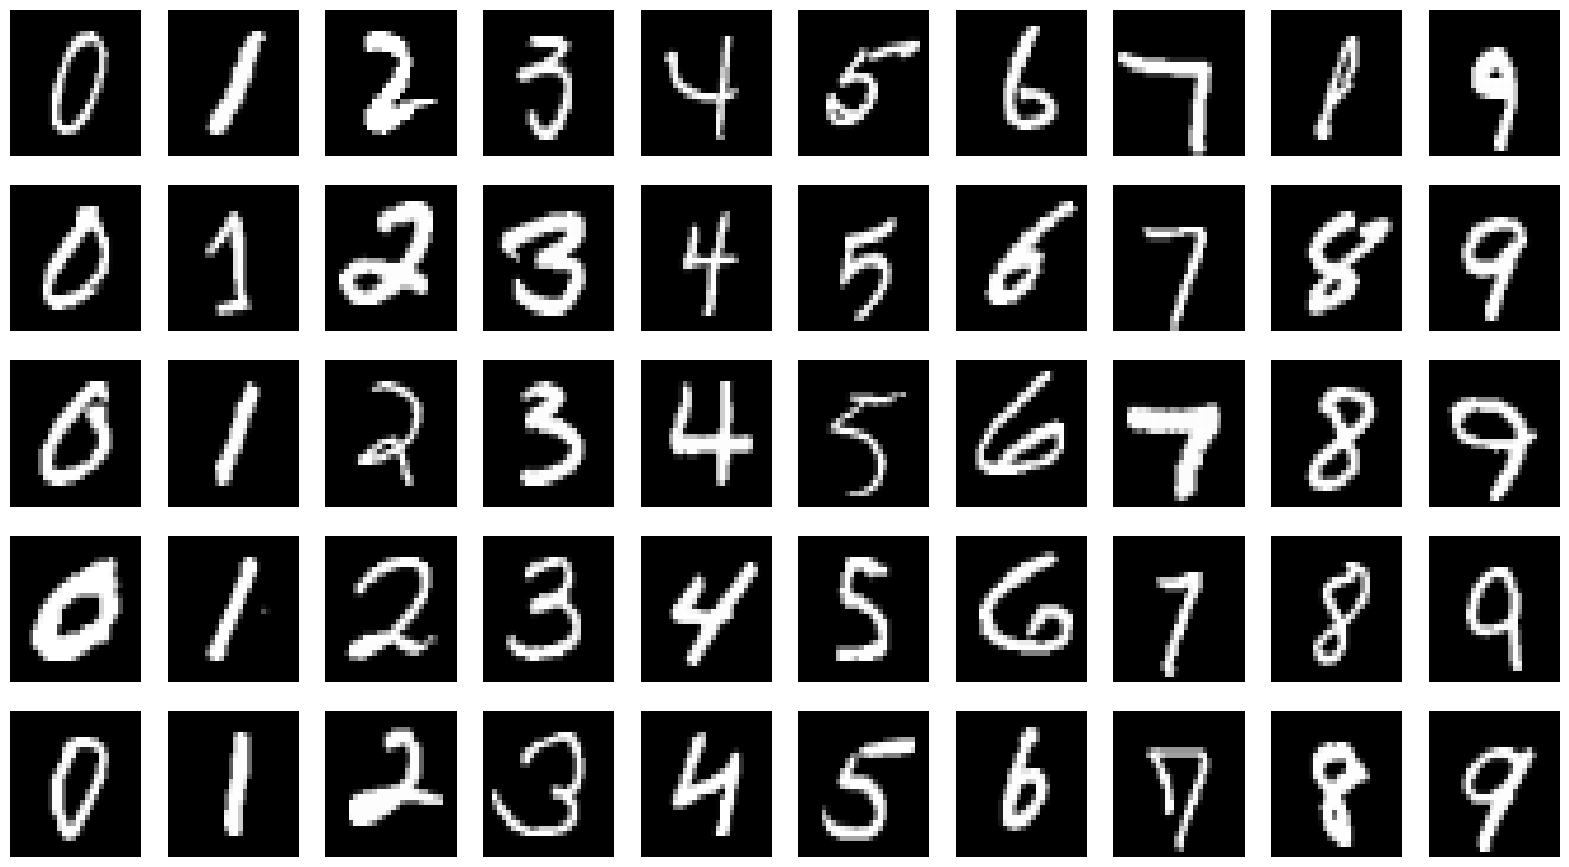

In [18]:
clf_util.plot_sample(X, y, classes, 5)

## Create training and test dataset

We then use our ```train_test_split()``` function to split the data into a training and a test set.

Notice that we're not defining this split in terms of percentages, but instead using whole numbers. We have 7500 training examples, and 2500 test examples.

**Group task:** What effect does it have if you make the training split larger or smaller? Test it!

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42,
                                                    train_size=7500, 
                                                    test_size=2500)

As with our simple image search algorithm, it's a good idea to scale our data when working with images.

Previously, we saw how to do what was called ```MinMax`` scaling. A simpler approach - and often just as effective - is simple to divide by the maximum possible value.

In [20]:
#scaling the features
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

## Train a logistic regression model

Next, I'm defining my Logistic Regression classifier. I've included a number of parameters here which we haven't yet looked at.

**Group task:** Check out the ```scikit-learn``` documentation for ```LogisticRegression()``` and read how each of the parameters here are defined. Can you understand what each of them do? Try changing some of them to see how it affects performance!

In [21]:
clf = LogisticRegression(tol=0.1, 
                         solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

When our model is finished learning, we have a collection of weights that the model has learned.

**Group task:** Before running the following cell, try to figure out what shape this matrix will be.

In [22]:
#to check the shape of the coefficient (weights) matrix
# 784 = number of pixels, 
# 10 = 
clf.coef_.shape

(10, 784)

## Interpreting the coefficients

We can plot the coefficients for our model, showing which 'features' are most informative when it comes to predicting each class

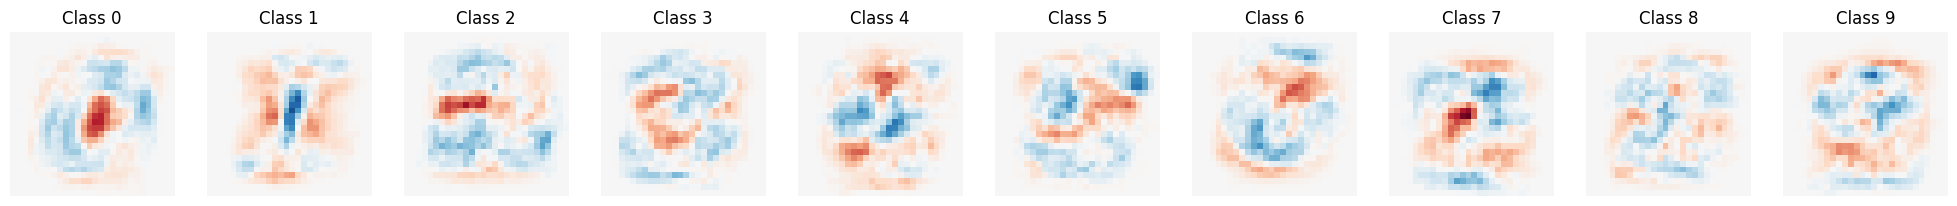

In [23]:
clf_util.plot_coefs(clf.coef_, nclasses)

## Individual predictions

We can then use this model to predict the class of an individual data point.

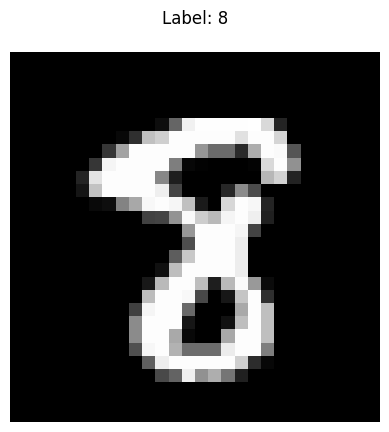

In [59]:
# how the model performs on individual data points
clf_util.plot_individual(X_test_scaled, 
                         y_test, 
                         1649) # pick a random image

We can compute the conditional probability for each class and then plot the probability distribution.

## Show the distribution of probabilities

I think that this is class 8


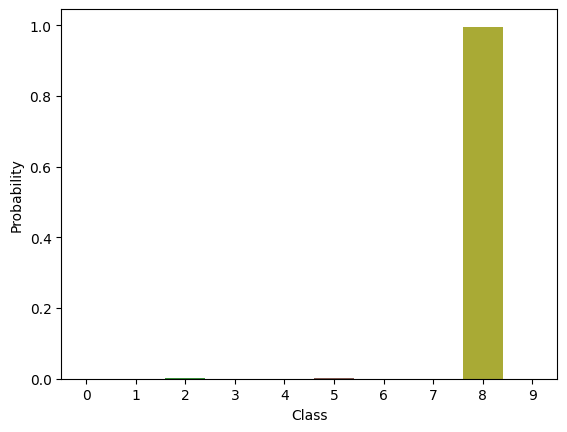

In [60]:
# probability distribution over the data
# what's the probability of the n number being in these classes
# different numbers will have different probability scores
clf_util.plot_probs(X_test_scaled, 1649, clf, classes)

We can find the class with the highest probability. 

If this matches the actual label for the first test sample, then our prediction is correct.

## Accuracy

We can calculate predictions for all data the scaled test data.

In [34]:
y_pred = clf.predict(X_test_scaled)

We then calculate metrics for accuracy based on comparing the predicted labels with the actual labels.

In [35]:
#method 2
# accuracy score: true FP and FN divided by entire data set
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9068


In [36]:
# confusion matrix
# saw previously that the model had a hard time predicting whether it was a 5 or an 8
# can see that 5 and 8 are the numbers with worst performances 
# 8 is the hardest of all the numbers to predict and 5 the second hardest 
cm = metrics.classification_report(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       251
           1       0.93      0.97      0.95       263
           2       0.89      0.89      0.89       233
           3       0.90      0.87      0.88       289
           4       0.88      0.92      0.90       203
           5       0.88      0.88      0.88       247
           6       0.93      0.94      0.94       254
           7       0.92      0.91      0.91       260
           8       0.88      0.84      0.86       243
           9       0.93      0.88      0.90       257

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



the precision is almost the same for 8 as all the other numbers, why is thsi when the recall and f1-score is significantly lower? 

This can be visualised using a confusion matrix

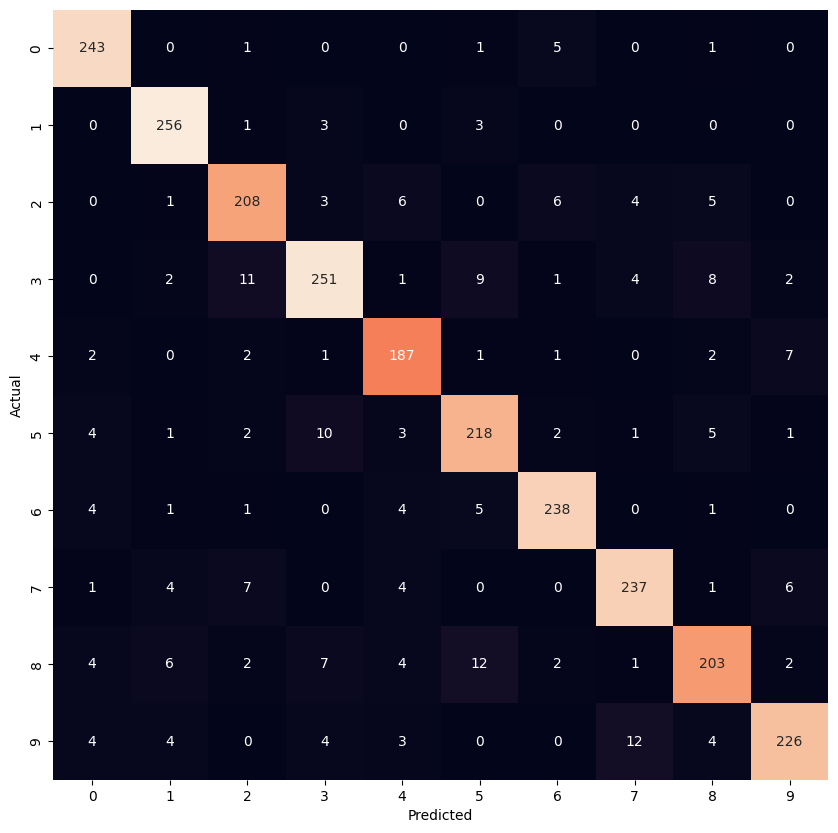

In [37]:
clf_util.plot_cm(y_test, y_pred, normalized=False)

We can also normalize the confusion matrix to show percentages instead of raw values

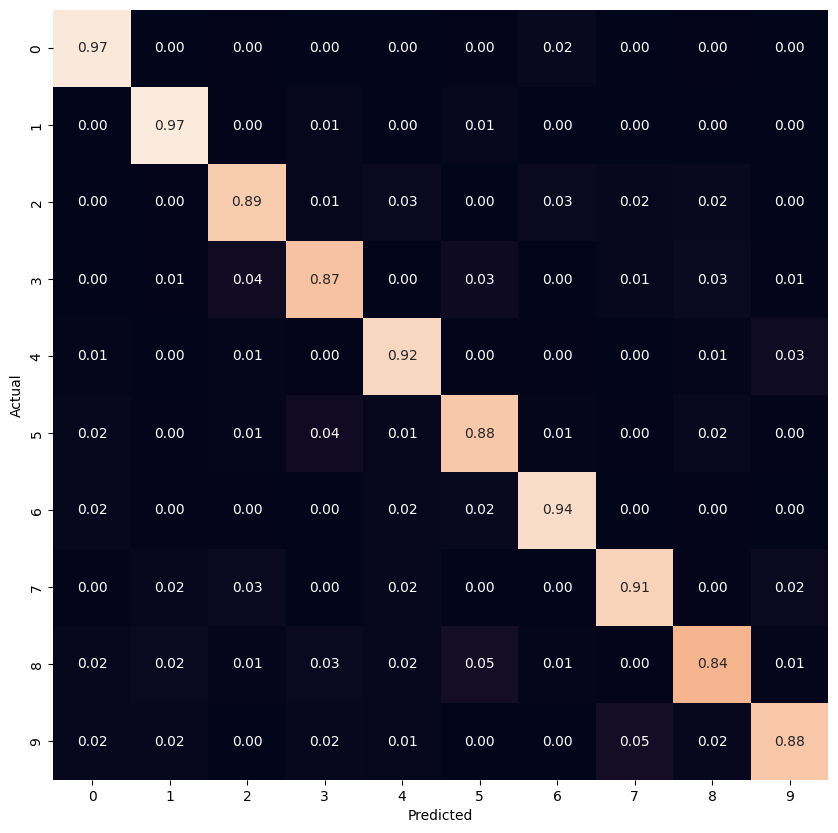

In [38]:
clf_util.plot_cm(y_test, y_pred, normalized=True)

## Test on new data

We want to take some new data -> an image we created with our own handwriting\
https://www.autodraw.com/ \
normalizing it so it's equal to what the mdoel has been trained on

In [62]:
import cv2
import matplotlib.pyplot as plt
from utils.imutils import jimshow, jimshow_channel

Question: Where should scaling come in this pipeline?  Does it matter at which point you do the scaling?

In [64]:
test_image = cv2.imread(os.path.join("..", "data", "img", "eight_autodraw_ses5.png" ))

Use 'bitwise_not' to invert regular grayscale

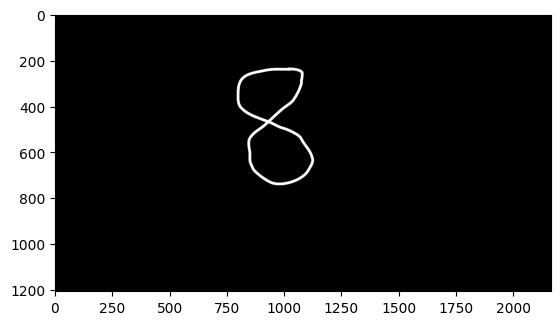

In [65]:
gray = cv2.bitwise_not(cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY))
plt.imshow(gray, cmap=plt.cm.gray)

The image has the wrong scaling: size of the image the model was trained on!\
Needs to stil retain the same structural data as the large image \
compressing -> resize down to 28x28 image

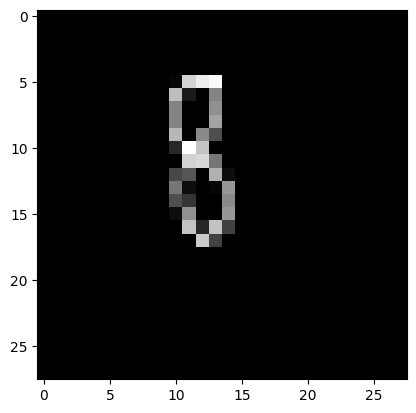

In [66]:
compressed = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
plt.imshow(compressed, cmap=plt.cm.gray)

### Qualitative evaluation

I think that this is class 8


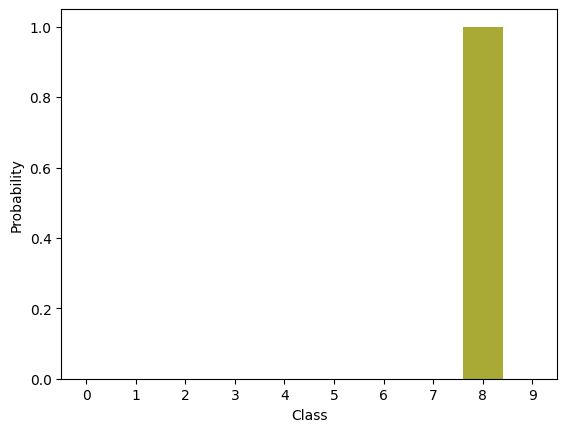

In [67]:
clf_util.predict_unseen(compressed, clf, classes)

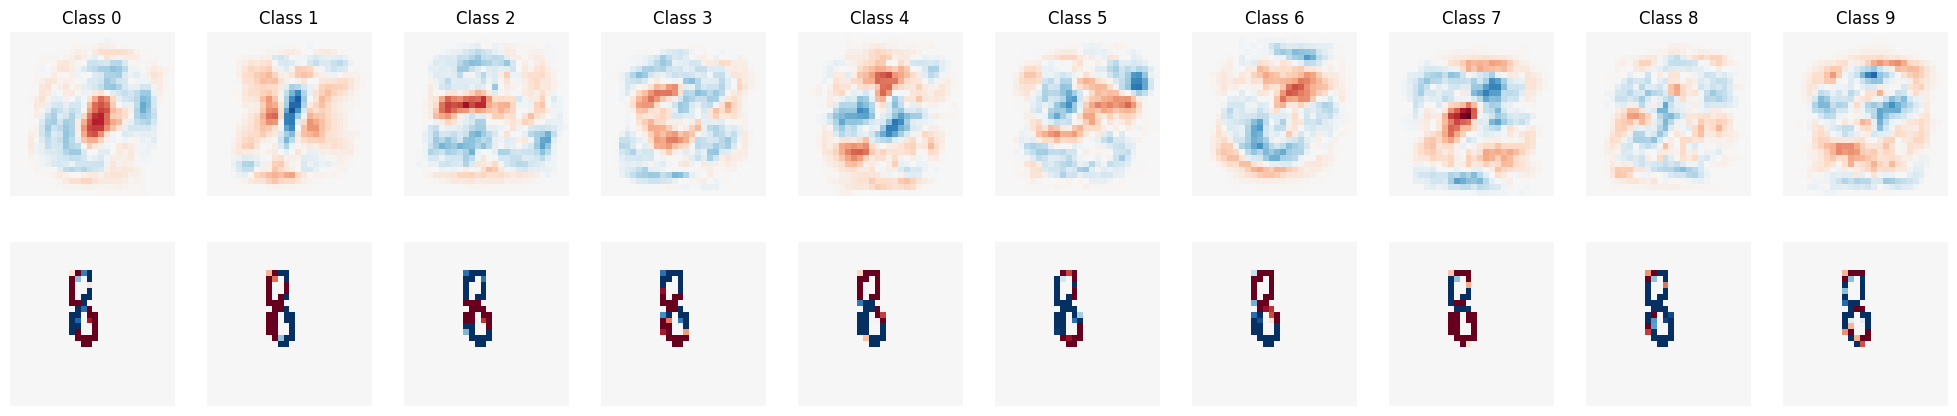

In [68]:
clf_util.prediction_coefficients(compressed, clf, classes)

## Tasks

- Go back to the start of this notebook and work through again in groups. Stop at the point where it says "Group Tasks" and work on this in groups of 3 or 4. 
  - If you get stuck, you can skip ahead to the next one, but try to cover all of them.
- Try the same thing using the ```MLPCLassifier()``` from ```scikit-learn```
  - If someone from your group wasn't there, explain to them how it works!